<a href="https://colab.research.google.com/github/thdnjs0730/2024_Deep/blob/main/%EC%88%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4%ED%95%99%EA%B3%BC_20231596_%EC%B5%9C%EC%86%8C%EC%9B%90_9%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C(New_%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 심층 신경망 -> 합성곱 신경망

In [1]:
# 라이브러리
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as n
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# fashion_mnist 데이터셋 내려받기
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


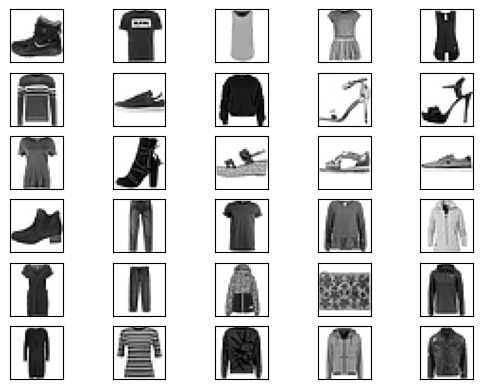

In [3]:
# 분류에 따라 사용될 클래스
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',   'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

for i in range(30):
    plt.subplot(6, 5, i+1)              # a, b은 전체 격자의 행(row)과 열(column) 개수
    plt.grid(False)                     # i+1은 현재 그릴 이미지의 위치
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [4]:
# 심층 신경망을 이용한 모델 생성 및 훈련
x_train, x_test = x_train/255.0, x_test/255.0         # 이미지 테이터를 255로 나눔, 반드시 해야 할 과정

model = tf.keras.models.Sequential([                  # Sequential 모델 생성
  tf.keras.layers.Flatten(input_shape=(28, 28)),      # 2차원 이미지를 1차원 배열로 변환, 28*28=784개의 노드로 변환됨
  tf.keras.layers.Dense(256, activation='relu'),      # n개의 노드가 있는 은닉층 생성, relu 함수를 활성화 함수로 사용
  tf.keras.layers.Dropout(0.3),                       # 과적합(over-fitting) 방지로 30% 드롭아웃
  tf.keras.layers.Dense(10, activation='softmax')     # 출력 노드는 총 10개, 출력층은 소프트맥스 함수 사용
])

model.compile(optimizer='adam',                       # 옵티마이저를 adam으로 사용
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# epochs = 훈련 데이터셋을 학습하는 주기
model.fit(x_train, y_train, epochs=7)                 # validation_split=0.2 -> 훈련 데이터의 20%를 검증 데이터로 사용
model.evaluate(x_test,  y_test, verbose=2)            # 테스트 데이터에 대한 정확도 계산

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7685 - loss: 0.6516
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8506 - loss: 0.4120
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8623 - loss: 0.3771
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8684 - loss: 0.3535
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8768 - loss: 0.3349
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8784 - loss: 0.3278
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8824 - loss: 0.3158
313/313 - 1s - 2ms/step - accuracy: 0.8700 - loss: 0.3573


[0.3572876453399658, 0.8700000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


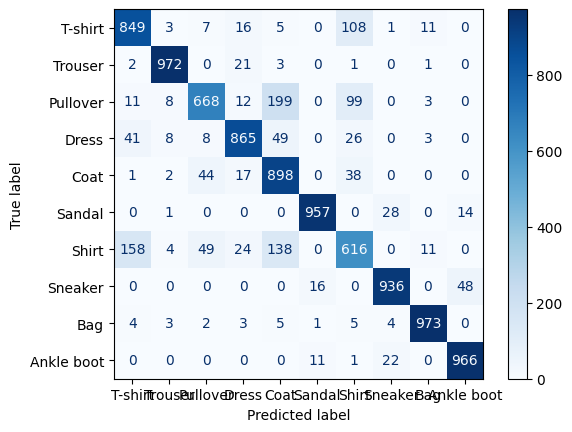

In [5]:
# 혼동 행렬
y_pred = model.predict(x_test)
y_pred = n.argmax(y_pred, axis=1)            # 클래스별 확률을 가진 배열을 반환
cm = confusion_matrix(y_test, y_pred)        # 혼동 행렬 생성

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)                 # 혼동 행렬 시각화
plt.show()

## 합성곱 신경망

In [9]:
# 데이터 전처리
image_height, image_width, color_channels = 28, 28, 1   # 이미지 높이, 너비, 채널 수
normalization_factor = 255.                             # 픽셀 값을 0-1 범위로 정규화하는 기준 값

X_train_final = x_train.reshape((-1, image_height, image_width, color_channels)) / normalization_factor
X_test_final = x_test.reshape((-1, image_height, image_width, color_channels)) / normalization_factor

In [10]:
# 합성곱 네트워크를 이용한 모델 생성
# Conv, MaxPooling 쌍으로 구성)
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),# 커널의 수는 32로 시작해서 점차 늘림
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 모델 훈련 / 평가
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.5789 - loss: 1.1333
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 39ms/step - accuracy: 0.7877 - loss: 0.5820
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.8239 - loss: 0.4877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.8475 - loss: 0.4250
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.8580 - loss: 0.3933
313/313 - 4s - 14ms/step - accuracy: 0.8402 - loss: 0.4293


[0.4292955994606018, 0.8402000069618225]

## MNIST 데이터셋을 활용한 분류 예측 모델

In [15]:
# 라이브러리
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [13]:
# 데이터 불러오기 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
# CNN 모델 구성
# Batch Normalization와 Dropout 층 추가
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# 모델 학습
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 88ms/step - accuracy: 0.7417 - loss: 0.8432 - val_accuracy: 0.9729 - val_loss: 0.0812
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 88ms/step - accuracy: 0.9552 - loss: 0.1528 - val_accuracy: 0.9829 - val_loss: 0.0609
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 90ms/step - accuracy: 0.9669 - loss: 0.1124 - val_accuracy: 0.9839 - val_loss: 0.0539
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.9729 - loss: 0.0921 - val_accuracy: 0.9868 - val_loss: 0.0493
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9747 - loss: 0.0880 - val_accuracy: 0.9856 - val_loss: 0.0494
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9796 - loss: 0.0730 - val_accuracy: 0.9857 - val_loss: 0.0481
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9786 - loss: 0.0709 - val_accuracy: 0.9858 - val_loss: 0.0483
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.9816 - loss: 0.0607 